In [1]:
from faker import Faker
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize Faker
tools = Faker()

# Generate Synthetic Loan Data
def generate_loan_data(n):
    data = []
    for _ in range(n):
        customer_id = tools.uuid4()
        age = random.randint(18, 70)
        income = round(random.uniform(20000, 150000), 2)
        credit_score = random.randint(300, 850)
        loan_amount = round(random.uniform(1000, 50000), 2)
        interest_rate = round(random.uniform(2.5, 25.0), 2)
        loan_term = random.choice([12, 24, 36, 48, 60])
        repayment_status = random.choice([0, 1])
        debt_to_income_ratio = round((loan_amount / income), 2)
        loan_history = random.randint(0, 5)
        employment_status = random.choice(['Employed', 'Self-Employed', 'Unemployed'])
        
        data.append([customer_id, age, income, credit_score, loan_amount, interest_rate, loan_term,
                     repayment_status, debt_to_income_ratio, loan_history, employment_status])
    
    return pd.DataFrame(data, columns=["customer_id", "age", "income", "credit_score", "loan_amount", "interest_rate",
                                       "loan_term", "repayment_status", "debt_to_income_ratio", "loan_history", "employment_status"])

# Generate dataset
loan_data = generate_loan_data(7000)

In [2]:
# Encode Categorical Features
encoder = LabelEncoder()
loan_data['employment_status'] = encoder.fit_transform(loan_data['employment_status'])

# Feature Selection
X = loan_data.drop(columns=["customer_id", "repayment_status"])
y = loan_data["repayment_status"]

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training & Hyperparameter Tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })
    
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_iter=10, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Cross-Validation AUC Scores
cv_auc_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_auc_scores}")
print(f"Mean AUC Score: {cv_auc_scores.mean():.2f}")

# Display Model Results
results_df = pd.DataFrame(results)
print(results_df)

Cross-Validation AUC Scores: [0.51885327 0.49808753 0.49149774 0.51780447 0.50484391]
Mean AUC Score: 0.51
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.495775   0.489583  0.468661  0.478894  0.495473
1        Random Forest  0.508451   0.502959  0.484330  0.493469  0.508182
2    Gradient Boosting  0.487324   0.482337  0.505698  0.493741  0.487529
3              XGBoost  0.488028   0.482066  0.478632  0.480343  0.487923


In [4]:
import pandas as pd
import random
from faker import Faker
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker
fake = Faker()

# Step 1: Generate Synthetic Transactional Data
def generate_transaction_data(n_customers, n_transactions):
    data = []
    customer_ids = [fake.uuid4() for _ in range(n_customers)]
    for _ in range(n_transactions):
        customer_id = random.choice(customer_ids)
        transaction_id = fake.uuid4()
        transaction_amount = round(random.uniform(10, 10000), 2)
        transaction_type = random.choice(["deposit", "withdrawal"])
        transaction_date = fake.date_this_year()
        data.append([
            customer_id, transaction_id, transaction_amount, transaction_type, transaction_date
        ])
    return pd.DataFrame(data, columns=[
        "customer_id", "transaction_id", "transaction_amount", "transaction_type", "transaction_date"
    ])

# Parameters
n_customers = 500
n_transactions = 10000

# Generate Data
transactions = generate_transaction_data(n_customers, n_transactions)

C:\Users\babuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babuk\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\babuk\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\babuk\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

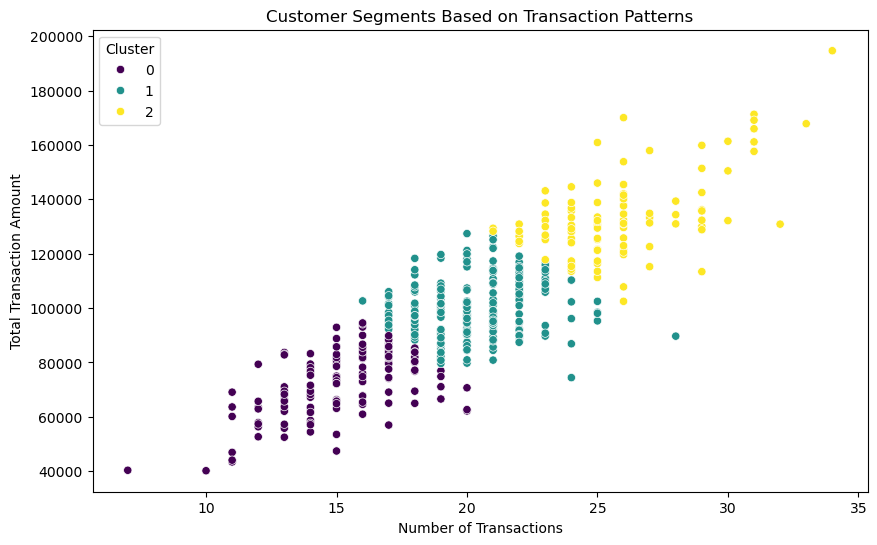

In [5]:
# Step 2: Data Preprocessing
# Aggregate data to customer level
customer_data = transactions.groupby('customer_id').agg({
    'transaction_id': 'count',
    'transaction_amount': 'sum'
}).rename(columns={
    'transaction_id': 'transaction_count',
    'transaction_amount': 'total_amount'
}).reset_index()

# Standardize features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['transaction_count', 'total_amount']])

# Step 3: Clustering
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# Step 4: Evaluation
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='transaction_count', y='total_amount', hue='cluster', palette='viridis')
plt.title('Customer Segments Based on Transaction Patterns')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Cluster')
plt.show()

In [6]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

def generate_interaction_data(n_customers, n_products, n_interactions):
    data = []
    customer_ids = [fake.uuid4() for _ in range(n_customers)]
    product_ids = [fake.uuid4() for _ in range(n_products)]
    
    for _ in range(n_interactions):
        customer_id = random.choice(customer_ids)
        product_id = random.choice(product_ids)
        interaction_type = random.choice(["purchased", "viewed", "clicked"])
        interaction_date = fake.date_this_year()
        
        data.append({
            "customer_id": customer_id,
            "product_id": product_id,
            "interaction_type": interaction_type,
            "interaction_date": interaction_date
        })
    
    return pd.DataFrame(data)

# Parameters
n_customers = 500  # Number of unique customers
n_products = 100    # Number of unique products
n_interactions = 10000  # Total number of interactions

# Generate the dataset
interaction_df = generate_interaction_data(n_cstomers, n_products, n_interactions)

# Display the first few rows of the dataset
print(interaction_df.head())

                            customer_id                            product_id  \
0  7b5082d0-b6c0-4b53-ba23-2c03c9db137c  28a4907c-57d7-4f9b-85b0-4494e9110cce   
1  d3f406f2-2007-472d-8adf-dd9d13a1081f  ea695570-bb84-4189-9d79-44bd62efbbd5   
2  fd7be6ce-a862-44f2-854f-1e0ca8c5e61d  2d4f0247-35f3-48c3-9768-c404de293c0c   
3  ead9fb77-28ab-4c91-b2b0-df42d9c221bf  755796af-bee9-4390-98ea-6a7a8fea6362   
4  756dde40-6467-40bb-8b2a-855c57d945b6  46583288-6668-431f-98f8-7d0340afe731   

  interaction_type interaction_date  
0          clicked       2025-02-22  
1           viewed       2025-01-15  
2        purchased       2025-03-25  
3           viewed       2025-01-21  
4        purchased       2025-02-17  


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# Assign numerical values to interaction types

interaction_mapping = {'viewed': 1, 'clicked': 2, 'purchased': 3}
interaction_df['interaction_value'] = interaction_df['interaction_type'].map(interaction_mapping)

# Create user-product interaction matrix
interaction_matrix = interaction_df.pivot_table(index='customer_id', columns='product_id', values='interaction_value', fill_value=0)

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Sample data loading
# interactions_df = pd.read_csv('path_to_interactions_data.csv')

# Create user-item interaction matrix
#interaction_matrix = interaction_df.pivot(index='customer_id', columns='product_id', values='interaction_type').fillna(0)

# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(interaction_matrix.values)

# Compute cosine similarity between items
item_similarity = cosine_similarity(sparse_matrix.T)

# Convert similarity matrix to DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=interaction_matrix.columns, columns=interaction_matrix.columns)

# Function to get item recommendations
def get_item_recommendations(item_id, num_recommendations):
    similar_items = item_similarity_df[item_id].sort_values(ascending=False).iloc[1:num_recommendations+1]
    return similar_items.index.tolist()

# Example: Get recommendations for a specific product
recommended_items = get_item_recommendations('28a4907c-57d7-4f9b-85b0-4494e9110cce', 5)
print(f"Items similar to 'product_123': {recommended_items}")

Items similar to 'product_123': ['46583288-6668-431f-98f8-7d0340afe731', '17f83c4d-f10d-49a8-95b5-8dc3dfe3aee7', '5e496cb5-af33-4194-9a6c-85770775bd6f', '41112b7e-1871-4611-a043-19d14098a885', 'a53e4837-065f-4e54-9984-b91a66011c95']
